In [1]:
from numpy.random import randn
import numpy as np
np.random.seed(123)
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_rows = 20

### 14.1 来自Bitly的USA.gov数据

2011年，URL缩短服务Bitly跟美国政府网站USA.gov合作，提供了一份从生成.gov或.mil短链接的用户那里收集来的匿名数据。在2011年，除实时数据之外，还可以下载文本文件形式的每小时快照。写作此书时（2017年），这项服务已经关闭，但我们保存一份数据用于本书的案例。

以每小时快照为例，文件中各行的格式为JSON（即JavaScript Object Notation，这是一种常用的Web数据格式）。例如，如果我们只读取某个文件中的第一行，那么所看到的结果应该是下面这样：

In [2]:
path = 'datasets/bitly_usagov/example.txt'

In [3]:
 open(path).readline() #打开文件，并读入一行

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

Python有内置或第三方模块可以将JSON字符串转换成Python字典对象。这里，我将使用json模块及其loads函数逐行加载已经下载好的数据文件：

In [4]:
import json
path = 'datasets/bitly_usagov/example.txt'
records = [json.loads(line) for line in open(path)]#列表推导式，records是list. json.loads(line)读入的是字典。

现在，records对象就成为一组Python字典了：

In [5]:
records[:2] 

[{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
  'c': 'US',
  'nk': 1,
  'tz': 'America/New_York',
  'gr': 'MA',
  'g': 'A6qOVH',
  'h': 'wfLQtf',
  'l': 'orofrog',
  'al': 'en-US,en;q=0.8',
  'hh': '1.usa.gov',
  'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
  'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
  't': 1331923247,
  'hc': 1331822918,
  'cy': 'Danvers',
  'll': [42.576698, -70.954903]},
 {'a': 'GoogleMaps/RochesterNY',
  'c': 'US',
  'nk': 0,
  'tz': 'America/Denver',
  'gr': 'UT',
  'g': 'mwszkS',
  'h': 'mwszkS',
  'l': 'bitly',
  'hh': 'j.mp',
  'r': 'http://www.AwareMap.com/',
  'u': 'http://www.monroecounty.gov/etc/911/rss.php',
  't': 1331923249,
  'hc': 1308262393,
  'cy': 'Provo',
  'll': [40.218102, -111.613297]}]

#### #用pandas对时区进行计数
从原始记录的集合创建DateFrame，与将记录列表传递到pandas.DataFrame一样简单：

In [6]:
import pandas as pd
frame = pd.DataFrame(records)#将字典转换为pandas
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [8]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

这里frame的输出形式是摘要视图（summary view），主要用于较大的DataFrame对象。我们然后可以对Series使用value_counts方法：

In [9]:
tz_counts = frame['tz'].value_counts() #对tz的各个值进行计数 返回seriers 默认为降序
tz_counts[:10]#取出最大的10的数

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [10]:
frame.head()#查看pandas

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [11]:
frame.count()

a              3440
c              2919
nk             3440
tz             3440
gr             2919
g              3440
h              3440
l              3440
al             3094
hh             3440
r              3440
u              3440
t              3440
hc             3440
cy             2919
ll             2919
_heartbeat_     120
kw               93
dtype: int64

我们可以用matplotlib可视化这个数据。为此，我们先给记录中未知或缺失的时区填上一个替代值。fillna函数可以替换缺失值（NA），而未知值（空字符串）则可以通过布尔型数组索引加以替换：

In [12]:
clean_tz = frame['tz'].fillna('Missing')#填充缺失值为‘Missing” 见增加的missing 120
clean_tz[clean_tz == ''] = 'Unknown'#将tz等于“”的命名为’unknown‘
tz_counts = clean_tz.value_counts()#重新计数
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [16]:
plt.figure(figsize=(8,6))

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

#### #此时，我们可以用seaborn包创建水平柱状图（结果见图14-1）：

<AxesSubplot:>

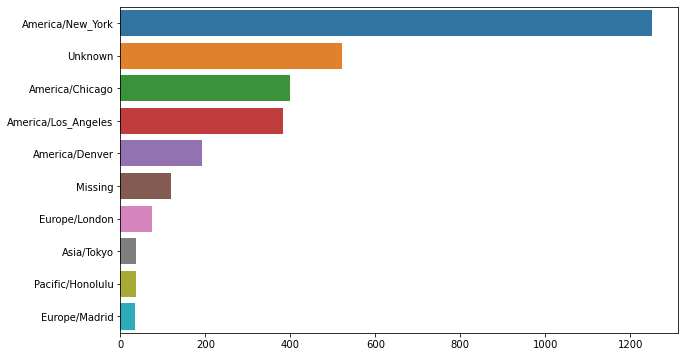

In [19]:
import seaborn as sns
subset = tz_counts[:10]
sns.barplot(y=subset.index, x=subset.values)

#### #
a字段含有执行URL短缩操作的浏览器、设备、应用程序的相关信息：

In [21]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [22]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [23]:
frame['a'][51][:50]  # 取前面50个字符

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

将这些"agent"字符串中的所有信息都解析出来是一件挺郁闷的工作。一种策略是将这种字符串的第一节（与浏览器大致对应）分离出来并得到另外一份用户行为摘要：

In [24]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])#对frame中“a"栏 先去掉缺失值，再按空格分开 再取第一个值；用列表推导式形成series
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [20]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

现在，假设你想按Windows和非Windows用户对时区统计信息进行分解。为了简单起见，我们假定只要agent字符串中含有"Windows"就认为该用户为Windows用户。由于有的agent缺失，所以首先将它们从数据中移除：

In [26]:
cframe = frame[frame.a.notnull()]#用布林表达式来选取“a"不为空的资料

In [27]:
cframe = cframe.copy()

然后计算出各行是否含有Windows的值：

In [28]:
cframe['os'] = np.where(cframe['a'].str.contains('Windows'),
                        'Windows', 'Not Windows')#增加一栏 使用np.where判断并填充，即如果字符窜包含‘window’，填‘window' 否则填’Not window‘
cframe['os'][:5]

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

接下来就可以根据时区和新得到的操作系统列表对数据进行分组了：

In [29]:
by_tz_os = cframe.groupby(['tz', 'os'])#分组

In [30]:
by_tz_os.count()[:5]#自己添加 查看分组效果

a  c   nk  gr    g    h    l   al   hh    r  \
tz                os                                                           
                  Not Windows  245  0  245   0  245  245  245  239  245  245   
                  Windows      276  0  276   0  276  276  276  268  276  276   
Africa/Cairo      Windows        3  3    3   3    3    3    3    3    3    3   
Africa/Casablanca Windows        1  1    1   1    1    1    1    1    1    1   
Africa/Ceuta      Windows        2  2    2   2    2    2    2    2    2    2   

                                 u    t   hc  cy  ll  _heartbeat_  kw  
tz                os                                                   
                  Not Windows  245  245  245   0   0            0   4  
                  Windows      276  276  276   0   0            0   7  
Africa/Cairo      Windows        3    3    3   3   3            0   0  
Africa/Casablanca Windows        1    1    1   1   1            0   0  
Africa/Ceuta      Windows        2    2    2   2   2            0   0

In [31]:
agg_counts = by_tz_os.size()#size()：计算数组和矩阵所有数据的个数 分组计数 与count_values类似 计算每个分组的个数
agg_counts[:10]

tz                              os         
                                Not Windows    245
                                Windows        276
Africa/Cairo                    Windows          3
Africa/Casablanca               Windows          1
Africa/Ceuta                    Windows          2
Africa/Johannesburg             Windows          1
Africa/Lusaka                   Windows          1
America/Anchorage               Not Windows      4
                                Windows          1
America/Argentina/Buenos_Aires  Not Windows      1
dtype: int64

分组计数，类似于value_counts函数，可以用size来计算。并利用unstack对计数结果进行重塑：

In [32]:
agg_counts = by_tz_os.size().unstack().fillna(0)#统计并拆堆 、填充缺失值
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


最后，我们来选取最常出现的时区。为了达到这个目的，我根据agg_counts中的行数构造了一个间接索引数组：

In [37]:
indexer = agg_counts.sum(1).argsort()#行方向加总 #argsort()函数是将x中的元素从小到大排列，提取其对应的index(索引号) sum(1)是 行方向相加
indexer[:10] #因此出现的数字是索引号 

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

然后我通过take按照这个顺序截取了最后10行最大值：

In [35]:
count_subset = agg_counts.take(indexer[-10:])#用take方法按顺序选出行 按indexer（最大10）中的索引从agg_counts中取元素，优点在于能还原成2栏
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


pandas有一个简便方法nlargest，可以做同样的工作：

In [46]:
agg_counts.sum(1).nlargest(10)#快速方法 nlargest()和nsmallest()，可以返回最大或最小的“多个值” 建议使用上面的

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

然后，如这段代码所示，可以用柱状图表示。我传递一个额外参数到seaborn的barpolt函数，来画一个堆积条形图（见图14-2）：

In [38]:
count_subset = count_subset.stack()

In [39]:
count_subset

tz                   os         
America/Sao_Paulo    Not Windows     13.0
                     Windows         20.0
Europe/Madrid        Not Windows     16.0
                     Windows         19.0
Pacific/Honolulu     Not Windows      0.0
                     Windows         36.0
Asia/Tokyo           Not Windows      2.0
                     Windows         35.0
Europe/London        Not Windows     43.0
                     Windows         31.0
America/Denver       Not Windows    132.0
                     Windows         59.0
America/Los_Angeles  Not Windows    130.0
                     Windows        252.0
America/Chicago      Not Windows    115.0
                     Windows        285.0
                     Not Windows    245.0
                     Windows        276.0
America/New_York     Not Windows    339.0
                     Windows        912.0
dtype: float64

In [40]:
count_subset.name = 'total'#series栏命名

In [41]:
count_subset = count_subset.reset_index()#将二个索引变为栏
count_subset[:10]

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


<AxesSubplot:xlabel='total', ylabel='tz'>

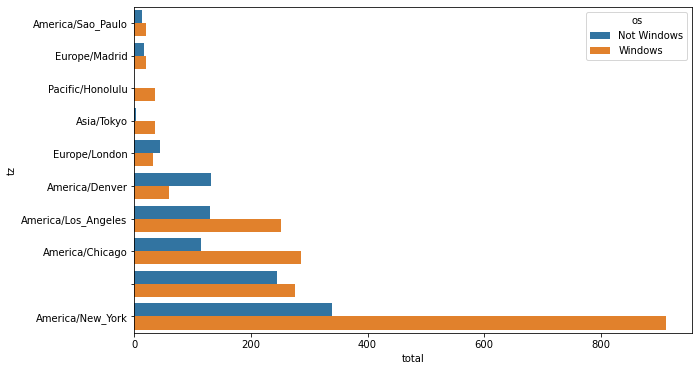

In [42]:
sns.barplot(x='total', y='tz', hue='os',  data=count_subset)

这张图不容易看出Windows用户在小分组中的相对比例，因此标准化分组百分比之和为1：

In [43]:
def norm_total(group):#定义函数
    group['normed_total'] = group.total / group.total.sum()
    return group

results = count_subset.groupby('tz').apply(norm_total)#分组 并计算出单项占每组的百分数，并在results中增加normed_total一栏

In [45]:
results[:6]#增加了normed_total

,tz,os,total,normed_total
0,America/Sao_Paulo,Not Windows,13.0,0.393939
1,America/Sao_Paulo,Windows,20.0,0.606061
2,Europe/Madrid,Not Windows,16.0,0.457143
3,Europe/Madrid,Windows,19.0,0.542857
4,Pacific/Honolulu,Not Windows,0.0,0.000000
5,Pacific/Honolulu,Windows,36.0,1.000000


再次画图，见图14-3：

<AxesSubplot:xlabel='normed_total', ylabel='tz'>

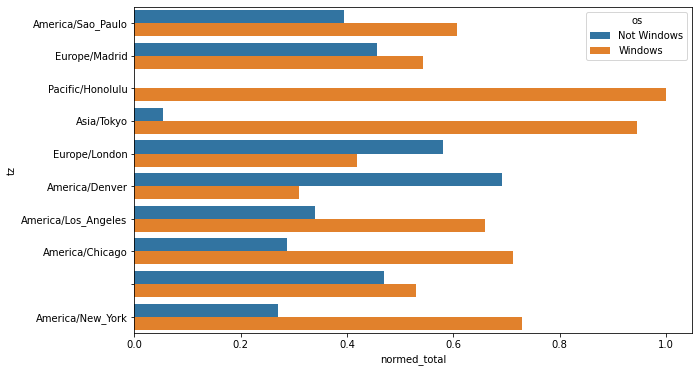

In [46]:
sns.barplot(x='normed_total', y='tz', hue='os',  data=results)#hue 将2行画在一起

#### #我们还可以用groupby的transform方法，更高效的计算标准化的和：

In [47]:
results2=results.copy()#另外一种方法

In [48]:
g = count_subset.groupby('tz')
results2['normed_total1'] = count_subset.total / g.total.transform('sum')#使用transform方法

In [49]:
results2[:10]

,tz,os,total,normed_total,normed_total1
0,America/Sao_Paulo,Not Windows,13.0,0.393939,0.393939
1,America/Sao_Paulo,Windows,20.0,0.606061,0.606061
2,Europe/Madrid,Not Windows,16.0,0.457143,0.457143
3,Europe/Madrid,Windows,19.0,0.542857,0.542857
4,Pacific/Honolulu,Not Windows,0.0,0.000000,0.000000
5,Pacific/Honolulu,Windows,36.0,1.000000,1.000000
6,Asia/Tokyo,Not Windows,2.0,0.054054,0.054054
7,Asia/Tokyo,Windows,35.0,0.945946,0.945946
8,Europe/London,Not Windows,43.0,0.581081,0.581081
9,Europe/London,Windows,31.0,0.418919,0.418919


<AxesSubplot:xlabel='normed_total1', ylabel='tz'>

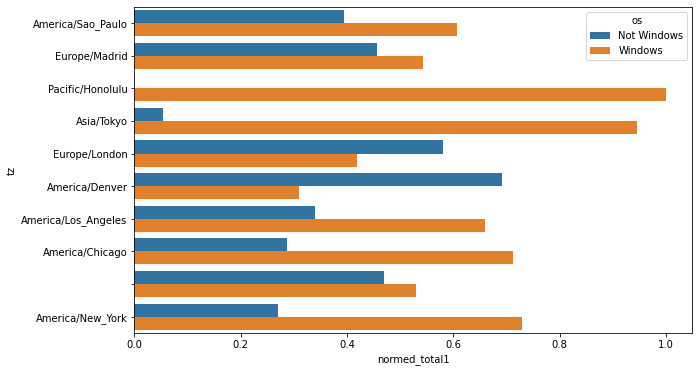

In [50]:
sns.barplot(x='normed_total1', y='tz', hue='os',  data=results2)

### 14.2 MovieLens 1M数据集
GroupLens Research（http://www.grouplens.org/node/73）采集了一组从20世纪90年末到21世纪初由MovieLens用户提供的电影评分数据。这些数据中包括电影评分、电影元数据（风格类型和年代）以及关于用户的人口统计学数据（年龄、邮编、性别和职业等）。基于机器学习算法的推荐系统一般都会对此类数据感兴趣。虽然我不会在本书中详细介绍机器学习技术，但我会告诉你如何对这种数据进行切片切块以满足实际需求。

MovieLens 1M数据集含有来自6000名用户对4000部电影的100万条评分数据。它分为三个表：评分、用户信息和电影信息。将该数据从zip文件中解压出来之后，可以通过pandas.read_table将各个表分别读到一个pandas DataFrame对象中：

In [51]:
import pandas as pd

# Make display smaller
pd.options.display.max_rows = 10 #设置最大数据显示为10行

In [52]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip'] #加入自定义列名
users = pd.read_table('datasets/movielens/users.dat', sep='::',
                      header=None, names=unames)
                                                          #以：：为分隔符读入数据 并命名列名 。直接形成dataframe
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('datasets/movielens/ratings.dat', sep='::',
                        header=None, names=rnames)

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('datasets/movielens/movies.dat', sep='::',
                       header=None, names=mnames)

C:\Users\mok9697m\anaconda3\envs\tf37\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mok9697m\anaconda3\envs\tf37\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys
C:\Users\mok9697m\anaconda3\envs\tf37\lib\site-packages\ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); yo

利用Python的切片语法，通过查看每个DataFrame的前几行即可验证数据加载工作是否一切顺利：

In [53]:
users[:6]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117


In [54]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [55]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [56]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


注意，其中的年龄和职业是以编码形式给出的，它们的具体含义请参考该数据集的README文件。分析散布在三个表中的数据可不是一件轻松的事情。假设我们想要根据性别和年龄计算某部电影的平均得分，如果将所有数据都合并到一个表中的话问题就简单多了。我们先用pandas的merge函数将ratings跟users合并到一起，然后再将movies也合并进去。pandas会根据列名的重叠情况推断出哪些列是合并（或连接）键：

In [57]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [58]:
data.iloc[0]#选取第一行 只有一行会以series形式显示

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [59]:
data.iloc[:3] #

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama


In [60]:
data.iloc[:2,1:4] ##

,movie_id,rating,timestamp
0,1193,5,978300760
1,1193,5,978298413


为了按性别计算每部电影的平均得分，我们可以使用pivot_table方法：

In [61]:
mean_ratings = data.pivot_table('rating', index='title',columns='gender', aggfunc='mean')
#用数据透视表pivot_table获得按性别分级的每部电影的平均电影评分。'rating'：需要聚合的列名；index='title'需要分组的列名；
#columns='gender'行上进行分组是列名

In [62]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


该操作产生了另一个DataFrame，其内容为电影平均得分，行标为电影名称（索引），列标为性别。现在，我打算过滤掉评分数据不够250条的电影（随便选的一个数字）。为了达到这个目的，我先对title进行分组，然后利用size()得到一个含有各电影分组大小的Series对象：

In [63]:
ratings_by_title = data.groupby('title').size()#以title分组，并取得每组的大小，即取得每部电影的得到的影评数量
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [65]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]#取得评价大于250的电影（也即过滤到太少评价的数据） 并获取该条件的index列表 方便下面loc选用
#布林表达式[ratings_by_title >= 250]也可以用下面的[ratings_by_title.values >= 250] 

In [66]:
active_titles[:10]

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)'],
      dtype='object', name='title')

标题索引中含有评分数据大于250条的电影名称，然后我们就可以据此从前面的mean_ratings中选取所需的行了：

In [67]:
# Select rows on the index
mean_ratings = mean_ratings.loc[active_titles]#使用loc选到 >250评价的列 推经典使用的方法
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


为了了解女性观众最喜欢的电影，我们可以对F列降序排列：

In [69]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)#使用sort_values方法（值排序p153页） 取得按女性评价从高到低的排序
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


#### #计算评分分歧
假设我们想要找出男性和女性观众分歧最大的电影。一个办法是给mean_ratings加上一个用于存放平均得分之差的列，并对其进行排序：

In [70]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']#加入新的列 即男性与女性平均评价的差异值
mean_ratings[:10]

gender,F,M,diff
title,,,
"'burbs, The (1989)",2.793478,2.962085,0.168607
10 Things I Hate About You (1999),3.646552,3.311966,-0.334586
101 Dalmatians (1961),3.791444,3.500000,-0.291444
101 Dalmatians (1996),3.240000,2.911215,-0.328785
12 Angry Men (1957),4.184397,4.328421,0.144024
"13th Warrior, The (1999)",3.112000,3.168000,0.056000
2 Days in the Valley (1996),3.488889,3.244813,-0.244076
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205,0.039102
2001: A Space Odyssey (1968),3.825581,4.129738,0.304156


按"diff"排序即可得到分歧最大且女性观众更喜欢的电影：

In [72]:
sorted_by_diff = mean_ratings.sort_values(by='diff')#取得以diff为升序排名的值 越小即女性评价比男性更高
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


对排序结果反序并取出前10行，得到的则是男性观众更喜欢的电影：

In [73]:
sorted_by_diff[::-1][:10]#小技巧即 用[::-1]来反转排名，可以轻松获得男性比女性评价高的电影

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


如果只是想要找出分歧最大的电影（不考虑性别因素），则可以计算得分数据的方差或标准差：

In [74]:
# Standard deviation of rating grouped by title 获取每部电影评分差异 所以不用分男女
rating_std_by_title = data.groupby('title')['rating'].std()#以title分组 并计算分组内'rating'的标准差  std()是内建函数所以可以直接引用

In [75]:
rating_std_by_title[:10]

title
$1,000,000 Duck (1971)               1.092563
'Night Mother (1986)                 1.118636
'Til There Was You (1997)            1.020159
'burbs, The (1989)                   1.107760
...And Justice for All (1979)        0.878110
1-900 (1994)                         0.707107
10 Things I Hate About You (1999)    0.989815
101 Dalmatians (1961)                0.982103
101 Dalmatians (1996)                1.098717
12 Angry Men (1957)                  0.812731
Name: rating, dtype: float64

In [76]:
rating_std_by_title1 = data.groupby('title')['rating'].agg(['std'])#上面取得标准差的另一种方法
rating_std_by_title1[:10]

,std
title,
"$1,000,000 Duck (1971)",1.092563
'Night Mother (1986),1.118636
'Til There Was You (1997),1.020159
"'burbs, The (1989)",1.107760
...And Justice for All (1979),0.878110
1-900 (1994),0.707107
10 Things I Hate About You (1999),0.989815
101 Dalmatians (1961),0.982103
101 Dalmatians (1996),1.098717


In [77]:
# Filter down to active_titles
rating_std_by_title = rating_std_by_title.loc[active_titles]##取得评价大于250的电影（也即过滤到太少评价的数据） 

In [78]:
# Order Series by value in descending order
rating_std_by_title.sort_values(ascending=False)[:10]#降序排序 获得分歧最大的电影

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

### 14.3 1880-2010年间全美婴儿姓名
美国社会保障总署（SSA）提供了一份从1880年到现在的婴儿名字频率数据。Hadley Wickham（许多流行R包的作者）经常用这份数据来演示R的数据处理功能。

我们要做一些数据规整才能加载这个数据集，这么做就会产生一个如下的DataFrame：

In [4]:
!type datasets\babynames\yob1880.txt #查看数据资料 windows下

Mary,F,7065
Anna,F,2604
Emma,F,2003
Elizabeth,F,1939
Minnie,F,1746
Margaret,F,1578
Ida,F,1472
Alice,F,1414
Bertha,F,1320
Sarah,F,1288
Annie,F,1258
Clara,F,1226
Ella,F,1156
Florence,F,1063
Cora,F,1045
Martha,F,1040
Laura,F,1012
Nellie,F,995
Grace,F,982
Carrie,F,949
Maude,F,858
Mabel,F,808
Bessie,F,794
Jennie,F,793
Gertrude,F,787
Julia,F,783
Hattie,F,769
Edith,F,768
Mattie,F,704
Rose,F,700
Catherine,F,688
Lillian,F,672
Ada,F,652
Lillie,F,647
Helen,F,636
Jessie,F,635
Louise,F,635
Ethel,F,633
Lula,F,621
Myrtle,F,615
Eva,F,614
Frances,F,605
Lena,F,603
Lucy,F,591
Edna,F,588
Maggie,F,582
Pearl,F,569
Daisy,F,564
Fannie,F,560
Josephine,F,544
Dora,F,524
Rosa,F,507
Katherine,F,502
Agnes,F,473
Marie,F,471
Nora,F,471
May,F,462
Mamie,F,436
Blanche,F,427
Stella,F,414
Ellen,F,411
Nancy,F,411
Effie,F,406
Sallie,F,404
Nettie,F,403
Della,F,391
Lizzie,F,388
Flora,F,365
Susie,F,361
Maud,F,345
Mae,F,344
Etta,F,323
Harriet,F,319
Sadie,F,317
Caroline,F,306
Katie,F,303
Lydia,F,302
Elsie,F,301
Kate,F,299
Susan,

Hence,M,6
Hillard,M,6
Hollie,M,6
Holmes,M,6
Hope,M,6
Hyman,M,6
Ishmael,M,6
Jarrett,M,6
Jessee,M,6
Joeseph,M,6
Junious,M,6
Kirk,M,6
Levy,M,6
Mervin,M,6
Michel,M,6
Milford,M,6
Mitchel,M,6
Nellie,M,6
Noble,M,6
Obed,M,6
Oda,M,6
Orren,M,6
Ottis,M,6
Rafe,M,6
Redden,M,6
Reese,M,6
Rube,M,6
Ruby,M,6
Rupert,M,6
Salomon,M,6
Sammie,M,6
Sanders,M,6
Soloman,M,6
Stacy,M,6
Stanford,M,6
Stanton,M,6
Thad,M,6
Titus,M,6
Tracy,M,6
Vernie,M,6
Wendell,M,6
Wilhelm,M,6
Willian,M,6
Yee,M,6
Zeke,M,6
Ab,M,5
Abbott,M,5
Agustus,M,5
Albertus,M,5
Almer,M,5
Alphonso,M,5
Alvia,M,5
Artie,M,5
Arvid,M,5
Ashby,M,5
Augusta,M,5
Aurthur,M,5
Babe,M,5
Baldwin,M,5
Barnett,M,5
Bartholomew,M,5
Barton,M,5
Bernie,M,5
Blaine,M,5
Boston,M,5
Brad,M,5
Bradford,M,5
Bradley,M,5
Brooks,M,5
Buck,M,5
Budd,M,5
Ceylon,M,5
Chalmers,M,5
Chesley,M,5
Chin,M,5
Cleo,M,5
Crockett,M,5
Cyril,M,5
Daisy,M,5
Denver,M,5
Dow,M,5
Duff,M,5
Edie,M,5
Edith,M,5
Elick,M,5
Elie,M,5
Eliga,M,5
Eliseo,M,5
Elroy,M,5
Ely,M,5
Ennis,M,5
Enrique,M,5
Erasmus,M,5
Esau,M,5
E


datasets\babynames\yob1880.txt


系统找不到指定的文件。
处理: #查看数据资料 时出错。
系统找不到指定的文件。
处理: windows下 时出错。


你可以用这个数据集做很多事，例如：

- 计算指定名字（可以是你自己的，也可以是别人的）的年度比例。
- 计算某个名字的相对排名。
- 计算各年度最流行的名字，以及增长或减少最快的名字。
- 分析名字趋势：元音、辅音、长度、总体多样性、拼写变化、首尾字母等。
- 分析外源性趋势：圣经中的名字、名人、人口结构变化等。

利用前面介绍过的那些工具，这些分析工作都能很轻松地完成，我会讲解其中的一些。

到编写本书时为止，美国社会保障总署将该数据库按年度制成了多个数据文件，其中给出了每个性别/名字组合的出生总数。这些文件的原始档案可以在这里获取：[http://www.ssa.gov/oact/babynames/limits.html](http://www.ssa.gov/oact/babynames/limits.html)。

如果你在阅读本书的时候这个页面已经不见了，也可以用搜索引擎找找。

下载"National data"文件names.zip，解压后的目录中含有一组文件（如yob1880.txt）。我用UNIX的head命令查看了其中一个文件的前10行（在Windows上，你可以用more命令，或直接在文本编辑器中打开）：

由于这是一个非常标准的以逗号隔开的格式，所以可以用pandas.read_csv将其加载到DataFrame中：

In [5]:
import pandas as pd
names1880 = pd.read_csv('datasets/babynames/yob1880.txt',
                        names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


这些文件中仅含有当年出现超过5次的名字。为了简单起见，我们可以用births列的sex分组小计表示该年度的births总计：

In [6]:
names1880.groupby('sex').births.sum()#性别分组，并计算出每组在1880的出生总数

sex
F     90993
M    110493
Name: births, dtype: int64

由于该数据集按年度被分隔成了多个文件，所以第一件事情就是要将所有数据都组装到一个DataFrame里面，并加上一个year字段。使用pandas.concat即可达到这个目的：

In [7]:
years = range(1880, 2011)#取得1880年至2010年的列表

pieces = [] #建立空的列表
columns = ['name', 'sex', 'births'] #dataframe的列名

for year in years:
    path = 'datasets/babynames/yob%d.txt' % year #路径名随循环逐一变动 注意%d的技巧
    frame = pd.read_csv(path, names=columns)   #逐一读入每年的dataframe

    frame['year'] = year  #在每个dataframe中加入年份的列
    pieces.append(frame)#将dataframe逐一加入到列表中

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True) #使用concat方法 将所有dataframe沿列方向粘合在一起（默认0轴），并重新排列index

这里需要注意几件事情。第一，concat默认是按行将多个DataFrame组合到一起的；第二，必须指定ignore_index=True，因为我们不希望保留read_csv所返回的原始行号。现在我们得到了一个非常大的DataFrame，它含有全部的名字数据：

In [8]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


有了这些数据之后，我们就可以利用groupby或pivot_table在year和sex级别上对其进行聚合了，如图14-4所示：

In [9]:
total_births = names.pivot_table('births', index='year',
                                 columns='sex', aggfunc=sum)
#用数据透视表pivot_table获得按year分组的即每年出生的男女的各自合计数量。'births'：需要聚合的列名；index='year'需要分组的列名；
#columns='sex'行上进行分组是列名
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


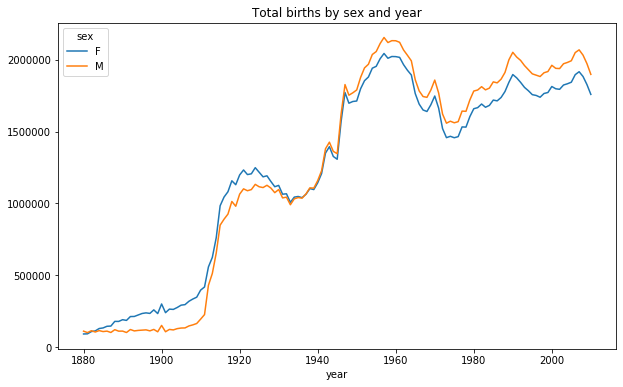

In [10]:
total_births.plot(title='Total births by sex and year')

下面我们来插入一个prop列，用于存放指定名字的婴儿数相对于总出生数的比例。prop值为0.02表示每100名婴儿中有2名取了当前这个名字。因此，我们先按year和sex分组，然后再将新列加到各个分组上：

In [11]:
def add_prop(group):#构建函数 取得分组后每个名字占男或女组 的百分率
    group['prop'] = group.births / group.births.sum() #取得分组后每个名字占男或女组 的百分率并增加一列‘prop’
    return group#注意这里返回增加后的整个dataframe(包含新的列) 
names = names.groupby(['year', 'sex']).apply(add_prop) #同上 返回增加一列的names

现在，完整的数据集就有了下面这些列：

In [12]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


在执行这样的分组处理时，一般都应该做一些有效性检查，比如验证所有分组的prop的总和是否为1：

In [13]:
names.groupby(['year', 'sex']).prop.sum()#检验完整性，即每年的男组或女组中prop列总计为1（即对上面的验证）

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

工作完成。为了便于实现更进一步的分析，我需要取出该数据的一个子集：每对sex/year组合的前1000个名字。这又是一个分组操作：

In [14]:
def get_top1000(group):##构建函数 为下面分组后，取得每年每个性别每排名前1000的值
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex']) #分组
top1000 = grouped.apply(get_top1000) 
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

In [15]:
# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)#删除索引 # inplace=True现场执行，drop=True去掉索引

In [16]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


接下来的数据分析工作就针对这个top1000数据集了。
#### #分析命名趋势
有了完整的数据集和刚才生成的top1000数据集，我们就可以开始分析各种命名趋势了。首先将前1000个名字分为男女两个部分：

In [17]:
boys = top1000[top1000.sex == 'M']#取出top1000中男孩的信息，布林操作
boys

,name,sex,births,year,prop
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277
944,James,M,5927,1880,0.053641
945,Charles,M,5348,1880,0.048401
946,George,M,5126,1880,0.046392
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [18]:
girls = top1000[top1000.sex == 'F']
girls

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
260872,Violeta,F,250,2010,0.000142
260873,Leilah,F,250,2010,0.000142
260874,Alaysia,F,250,2010,0.000142
260875,Dania,F,249,2010,0.000142


这是两个简单的时间序列，只需稍作整理即可绘制出相应的图表（比如每年叫做John和Mary的婴儿数）。我们先生成一张按year和name统计的总出生数透视表：

In [19]:
total_births = top1000.pivot_table('births', index='year',
                                   columns='name',
                                   aggfunc=sum)#对每个名字的每年出生数量用透视表 进行分析 

In [20]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [21]:
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


现在，我们用DataFrame的plot方法绘制几个名字的曲线图（见图14-5）：

In [22]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]#取出指定的列
subset

name,John,Harry,Mary,Marilyn
year,,,,
1880,9701.0,2158.0,7092.0,NaN
1881,8795.0,2002.0,6948.0,NaN
1882,9597.0,2246.0,8179.0,NaN
1883,8934.0,2116.0,8044.0,NaN
1884,9427.0,2338.0,9253.0,NaN
...,...,...,...,...
2006,15140.0,414.0,4073.0,596.0
2007,14405.0,443.0,3665.0,597.0
2008,13273.0,379.0,3478.0,543.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000185C3A99248>,
      dtype=object)

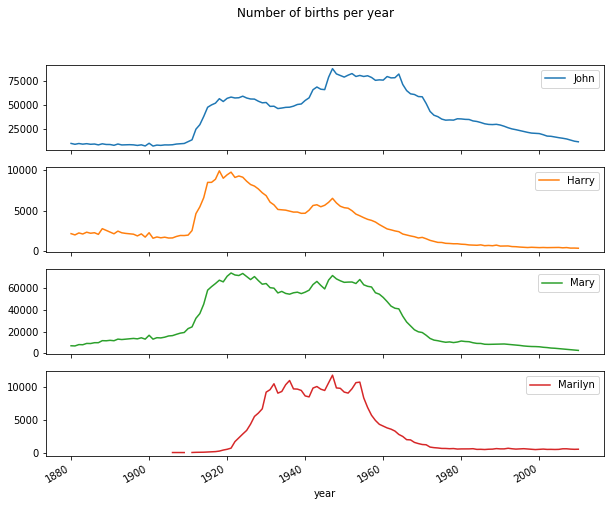

In [23]:
subset.plot(subplots=True, figsize=(10, 8), grid=False,
            title="Number of births per year") #subplots=True 允许每列数据画成一个子图

从图中可以看出，这几个名字在美国人民的心目中已经风光不再了。但事实并非如此简单，我们在下一节中就能知道是怎么一回事了。
#### #评估命名多样性的增长
一种解释是父母愿意给小孩起常见的名字越来越少。这个假设可以从数据中得到验证。一个办法是计算最流行的1000个名字所占的比例，我按year和sex进行聚合并绘图（见图14-6）：

In [24]:
table = top1000.pivot_table('prop', index='year',
                            columns='sex', aggfunc=sum)#以性别为分组的每年合计出生率 用透视表 进行分析  即随时间的的推移前1000的姓名的合计出生率在该分组中的比重

In [25]:
table

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2006,0.753153,0.860368
2007,0.745959,0.855159
2008,0.740933,0.850003


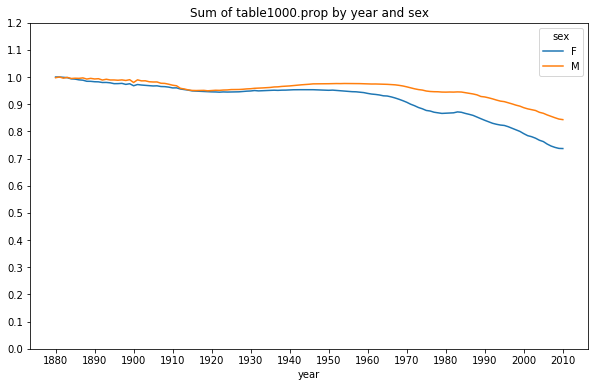

In [26]:
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))#由图可知无论男女前1000个的合计出生率均在下降，即名字出现多样化的趋势

从图中可以看出，名字的多样性确实出现了增长（前1000项的比例降低）。另一个办法是计算占总出生人数前50%的不同名字的数量，这个数字不太好计算。我们只考虑2010年男孩的名字：

In [32]:
df = boys[boys.year == 2010] #取出2010年男孩的信息
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


在对prop降序排列之后，我们想知道前面多少个名字的人数加起来才够50%。虽然编写一个for循环确实也能达到目的，但NumPy有一种更聪明的矢量方式。先计算prop的累计和cumsum，然后再通过searchsorted方法找出0.5应该被插入在哪个位置才能保证不破坏顺序：

In [33]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()#对2010年男孩的名字出生率按大到小排序 并计算其累计数
prop_cumsum

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
            ...   
261872    0.842748
261873    0.842850
261874    0.842953
261875    0.843055
261876    0.843156
Name: prop, Length: 1000, dtype: float64

In [29]:
prop_cumsum.values.searchsorted(0.5)#取出值累加到0.5的 序号（即第几个数）searchsorted在np附录

116

由于数组索引是从0开始的，因此我们要给这个结果加1，即最终结果为117。拿1900年的数据来做个比较，这个数字要小得多：

In [35]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1  #同上面 取出1900年 +1是由于计数是从0开始的 即累计到0.5是在第25个名字

25

In [36]:
in1900

40877    0.065319
40878    0.122308
40879    0.170437
40880    0.206338
40881    0.233584
           ...   
41848    0.979489
41847    0.979542
41846    0.979595
41845    0.979648
41876    0.979702
Name: prop, Length: 1000, dtype: float64

现在就可以对所有year/sex组合执行这个计算了。按这两个字段进行groupby处理，然后用一个函数计算各分组的这个值：

In [37]:
def get_quantile_count(group, q=0.5): #定义取得累加到0.5是第几个名字的函数
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

In [38]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count) #按['year', 'sex']分组 并调用函数返回 累加到0.5是第几个名字的函数

In [39]:
diversity

year  sex
1880  F       38
      M       14
1881  F       38
      M       14
1882  F       38
            ... 
2008  M      109
2009  F      241
      M      114
2010  F      246
      M      117
Length: 262, dtype: int64

In [40]:
diversity = diversity.unstack('sex')#拆堆
diversity

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2006,209,99
2007,223,103
2008,234,109


现在，diversity这个DataFrame拥有两个时间序列（每个性别各一个，按年度索引）。通过IPython，你可以查看其内容，还可以像之前那样绘制图表（如图14-7所示）：

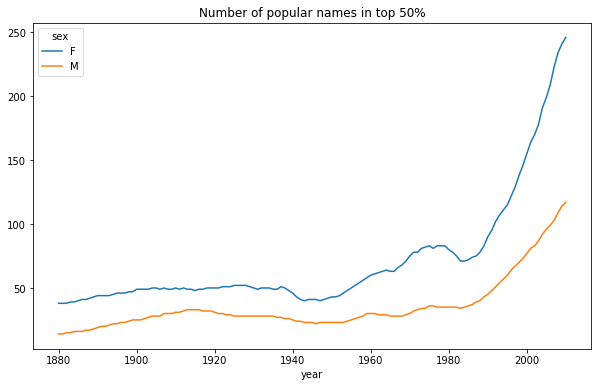

In [41]:
diversity.plot(title="Number of popular names in top 50%")

从图中可以看出，女孩名字的多样性总是比男孩的高，而且还在变得越来越高。读者们可以自己分析一下具体是什么在驱动这个多样性（比如拼写形式的变化）。

####  #“最后一个字母”的变革
2007年，一名婴儿姓名研究人员Laura Wattenberg在她自己的网站上指出（http://www.babynamewizard.com）：近百年来，男孩名字在最后一个字母上的分布发生了显著的变化。为了了解具体的情况，我首先将全部出生数据在年度、性别以及末字母上进行了聚合：

In [42]:
# extract last letter from name column
get_last_letter = lambda x: x[-1] #定义lambda函数 即得到每个名字的最后一个字母
last_letters = names.name.map(get_last_letter) #对name列调用函数得到每个名字的最后一个字母并形成新的series；maps是将函数应用到指定列名中的每一个名字，作用同apply
last_letters

0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: name, Length: 1690784, dtype: object

In [43]:
last_letters.name = 'last_letter'#命名为'last_letter'

In [45]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [44]:
table = names.pivot_table('births', index=last_letters,
                          columns=['sex', 'year'], aggfunc=sum)#透视表 以最后一个字母为索引分类，以['sex', 'year'] 为行上分类
table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
...              ...      ...      ...      ...      ...      ...      ...   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2001      2002      2003   
last_letter                             ...                                 
a            48942.0  59442.0  58631.0  ...   39124.0   38815.0   37825.0   
b                NaN      NaN      NaN  ...   50950.0   49284.0   48065.0   
c                NaN      NaN      NaN  ...   27113.0   27238.0   27697.0   
d             1027.0   1298.0   1374.0  ...   60838.0   55829.0   53391.0   
e            54353.0  66750.0  66663.0  ...  145395.0  144651.0  144769.0   
...              ...      ...      ...  ...       ...       ...       ...   
v                NaN      NaN      NaN  ...    1209.0    1332.0    1652.0   
w                NaN      NaN      NaN  ...   52265.0   50103.0   49079.0   
x                NaN      NaN      NaN  ...   10691.0   11009.0   11718.0   
y            14980.0  17931.0  17601.0  ...  139109.0  134557.0  130569.0   
z              188.0    238.0    277.0  ...    2840.0    2737.0    2722.0   

sex                                                                      \
year             2004      2005      2006      2007      2008      2009   
last_letter                                                               
a             38650.0   36838.0   36156.0   34654.0   32901.0   31430.0   
b             45914.0   43144.0   42600.0   42123.0   39945.0   38862.0   
c             26778.0   26078.0   26635.0   26864.0   25318.0   24048.0   
d             51754.0   50670.0   51410.0   50595.0   47910.0   46172.0   
e            142098.0  141123.0  142999.0  143698.0  140966.0  135496.0   
...               ...       ...       ...       ...       ...       ...   
v              1823.0    1794.0    2010.0    2295.0    2418.0    2589.0   
w             47556.0   45464.0   43217.0   40251.0   36937.0   33181.0   
x             12399.0   13025.0   13992.0   14306.0   14834.0   16640.0   
y            128367.0  125190.0  123707.0  123397.0  122633.0  112922.0   
z              2710.0    2903.0    3086.0    3301.0    3473.0    3633.0   

sex                    
year             2010  
last_letter            
a             28438.0  
b             38859.0  
c             23125.0  
d             44398.0  
e            129012.0  
...               ...  
v              2723.0  
w             30656.0  
x             16352.0  
y            110425.0  
z              3476.0  

[26 rows x 262 columns]

然后，我选出具有一定代表性的三年，并输出前面几行：

In [46]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')#选择[1910, 1960, 2010]几列 注意复合索引
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

接下来我们需要按总出生数对该表进行规范化处理，以便计算出各性别各末字母占总出生人数的比例：

In [47]:
subtable.sum() #各列加总

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [48]:
letter_prop = subtable / subtable.sum()#datafame向量化计算 得到每个字母的百分率
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
...               ...       ...       ...       ...       ...       ...
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

[26 rows x 6 columns]

In [49]:
letter_prop.sum()#j可以进行验证

sex  year
F    1910    1.0
     1960    1.0
     2010    1.0
M    1910    1.0
     1960    1.0
     2010    1.0
dtype: float64

有了这个字母比例数据之后，就可以生成一张各年度各性别的条形图了，如图14-8所示：

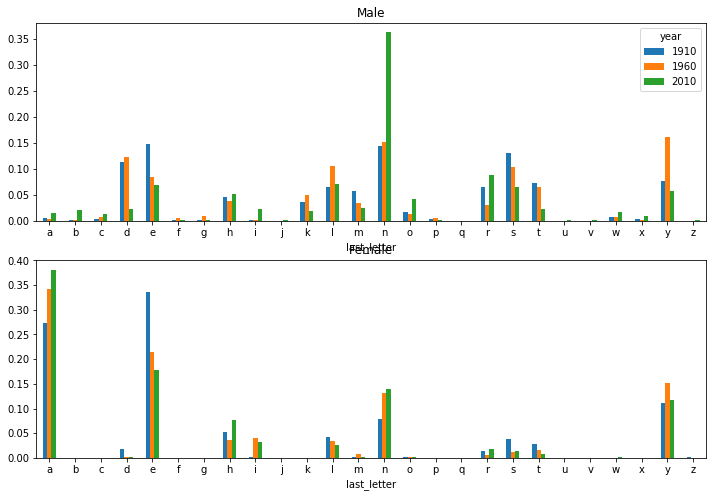

In [51]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(12, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                      legend=False)

可以看出，从20世纪60年代开始，以字母"n"结尾的男孩名字出现了显著的增长。回到之前创建的那个完整表，按年度和性别对其进行规范化处理，并在男孩名字中选取几个字母，最后进行转置以便将各个列做成一个时间序列：

In [52]:
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T #取出男孩 'd', 'n', 'y'几个列的数据 并进行转置
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


有了这个时间序列的DataFrame之后，就可以通过其plot方法绘制出一张趋势图了（如图14-9所示）：

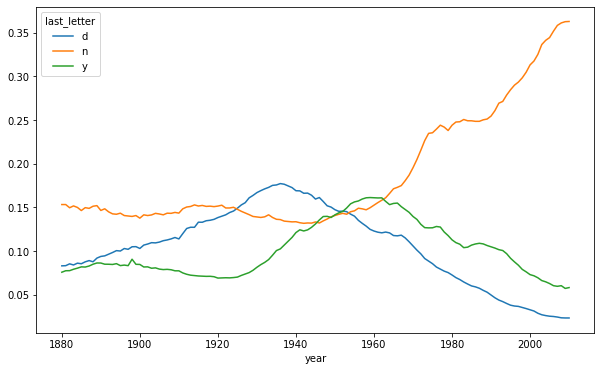

In [53]:
dny_ts.plot()

#### #变成女孩名字的男孩名字（以及相反的情况）
另一个有趣的趋势是，早年流行于男孩的名字近年来“变性了”，例如Lesley或Leslie。回到top1000数据集，找出其中以"lesl"开头的一组名字：

In [54]:
all_names = pd.Series(top1000.name.unique())#取得所有不重复的名字
all_names

0            Mary
1            Anna
2            Emma
3       Elizabeth
4          Minnie
          ...    
6863        Masen
6864        Rowen
6865       Yousef
6866       Joziah
6867       Maxton
Length: 6868, dtype: object

In [55]:
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

然后利用这个结果过滤其他的名字，并按名字分组计算出生数以查看相对频率：

In [56]:
filtered = top1000[top1000.name.isin(lesley_like)]#取得所有名字lesley_like中的数据
filtered

,name,sex,births,year,prop
632,Leslie,F,8,1880,0.000088
1108,Leslie,M,79,1880,0.000715
2462,Leslie,F,11,1881,0.000120
3014,Leslie,M,92,1881,0.000913
4512,Leslie,F,9,1882,0.000083
...,...,...,...,...,...
256327,Lesly,F,699,2008,0.000371
258036,Leslie,F,1975,2009,0.001081
258378,Lesly,F,598,2009,0.000327
260073,Leslie,F,1558,2010,0.000886


接下来，我们按性别和年度进行聚合，并按年度进行规范化处理：

In [57]:
filtered.groupby('name').births.sum()#以名字为分组计算出生合计数

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

接下来，我们按性别和年度进行聚合，并按年度进行规范化处理：

In [58]:
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')#在filtered计算每年男女各组中包含5个名字的合计
table

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0
...,...,...
2006,4166.0,NaN
2007,3805.0,NaN
2008,3022.0,NaN


In [59]:
table = table.div(table.sum(1), axis=0)#先加总男女总数 再明年男女分别除以 男女明年的的总数
table

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
...,...,...
2006,1.000000,NaN
2007,1.000000,NaN
2008,1.000000,NaN


最后，就可以轻松绘制一张分性别的年度曲线图了（如图2-10所示）：

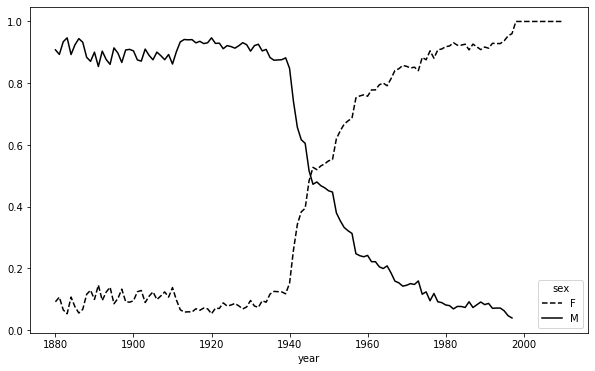

In [60]:
table.plot(style={'M': 'k-', 'F': 'k--'})

由上图可知Leslee Lesley Lesli Leslie Lesly 这5个名字用在女性的名字中逐渐增多

### 14.4 USDA食品数据库
美国农业部（USDA）制作了一份有关食物营养信息的数据库。Ashley Williams制作了该数据的JSON版（http://ashleyw.co.uk/project/food-nutrient-database）。其中的记录如下所示：

从上面列举的那个网址下载并解压数据之后，你可以用任何喜欢的JSON库将其加载到Python中。我用的是Python内置的json模块：

In [2]:
import json
db = json.load(open('datasets/usda_food/database.json'))#字典形式的列表 key:id、tags、manufacturer 、group、portions、'nutrients'其中portions、'nutrients'还有内嵌字典
len(db)

6636

In [5]:
db[0]

{'id': 1008,
 'description': 'Cheese, caraway',
 'tags': [],
 'manufacturer': '',
 'group': 'Dairy and Egg Products',
 'portions': [{'amount': 1, 'unit': 'oz', 'grams': 28.35}],
 'nutrients': [{'value': 25.18,
   'units': 'g',
   'description': 'Protein',
   'group': 'Composition'},
  {'value': 29.2,
   'units': 'g',
   'description': 'Total lipid (fat)',
   'group': 'Composition'},
  {'value': 3.06,
   'units': 'g',
   'description': 'Carbohydrate, by difference',
   'group': 'Composition'},
  {'value': 3.28, 'units': 'g', 'description': 'Ash', 'group': 'Other'},
  {'value': 376.0,
   'units': 'kcal',
   'description': 'Energy',
   'group': 'Energy'},
  {'value': 39.28,
   'units': 'g',
   'description': 'Water',
   'group': 'Composition'},
  {'value': 1573.0, 'units': 'kJ', 'description': 'Energy', 'group': 'Energy'},
  {'value': 0.0,
   'units': 'g',
   'description': 'Fiber, total dietary',
   'group': 'Composition'},
  {'value': 673.0,
   'units': 'mg',
   'description': 'Calcium,

db中的每个条目都是一个含有某种食物全部数据的字典。nutrients字段是一个字典列表，其中的每个字典对应一种营养成分：

In [6]:
db[0].keys()#取出字典的key

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [7]:
db[0]['nutrients'][0]#取出字典中字典

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [64]:
nutrients = pd.DataFrame(db[0]['nutrients'])#将字典组成的列表转为dataframe 只是大字典中的第一个里的['nutrients']
nutrients[:7]

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy


在将字典列表转换为DataFrame时，可以只抽取其中的一部分字段。这里，我们将取出食物的名称、分类、编号以及制造商等信息：

In [8]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys) #将db中['description', 'group', 'id', 'manufacturer'几个字段的值转换为datafame
info

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
...,...,...,...,...
6631,"Bologna, beef, low fat",Sausages and Luncheon Meats,42161,
6632,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,42173,
6633,"Babyfood, juice, pear",Baby Foods,43408,None
6634,"Babyfood, dessert, banana yogurt, strained",Baby Foods,43539,None


通过value_counts，你可以查看食物类别的分布情况：

In [9]:
pd.value_counts(info.group)[:20]#对group进行个数进行排序 即食物种类

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Pork Products                        328
Fruits and Fruit Juices              328
Beverages                            278
Soups, Sauces, and Gravies           275
Finfish and Shellfish Products       255
Baby Foods                           209
Cereal Grains and Pasta              183
Ethnic Foods                         165
Snacks                               162
Nut and Seed Products                128
Poultry Products                     116
Sausages and Luncheon Meats          111
Name: group, dtype: int64

现在，为了对全部营养数据做一些分析，最简单的办法是将所有食物的营养成分整合到一个大表中。我们分几个步骤来实现该目的。首先，将各食物的营养成分列表转换为一个DataFrame，并添加一个表示编号的列，然后将该DataFrame添加到一个列表中。最后通过concat将这些东西连接起来就可以了：

顺利的话，nutrients的结果是：

In [10]:
nutrients = []#创建列表 用于存放dtaefame

for rec in db:       #在db中循环 
    fnuts = pd.DataFrame(rec['nutrients'])#将取出的字典放入datafame (通过字典的key将内部嵌套的字典提取出来)
    fnuts['id'] = rec['id']#加入id列
    nutrients.append(fnuts) #将datafame逐一加入列表

nutrients = pd.concat(nutrients, ignore_index=True) #将列表中的dataframe沿0轴粘合起来

In [11]:
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


我发现这个DataFrame中无论如何都会有一些重复项，所以直接丢弃就可以了：

In [13]:
nutrients.duplicated().sum()  # number of duplicates统计重复行

14179

In [14]:
nutrients = nutrients.drop_duplicates()#drop_duplicates方法用于返回一个移除了重复行的DataFrame
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


由于两个DataFrame对象中都有"group"和"description"，所以为了明确到底谁是谁，我们需要对它们进行重命名：

In [72]:
col_mapping = {'description' : 'food',
               'group'       : 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)#修改info的列名
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [15]:
col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)#修改nutrients的列名
nutrients

,value,units,nutrient,nutgroup,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


做完这些，就可以将info跟nutrients合并起来：

In [16]:
ndata = pd.merge(nutrients, info, on='id', how='outer')#合并2个dataframe
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         375176 non-null  float64
 1   units         375176 non-null  object 
 2   nutrient      375176 non-null  object 
 3   nutgroup      375176 non-null  object 
 4   id            375176 non-null  int64  
 5   description   375176 non-null  object 
 6   group         375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [17]:
ndata

,value,units,nutrient,nutgroup,id,description,group,manufacturer
0,25.180,g,Protein,Composition,1008,"Cheese, caraway",Dairy and Egg Products,
1,29.200,g,Total lipid (fat),Composition,1008,"Cheese, caraway",Dairy and Egg Products,
2,3.060,g,"Carbohydrate, by difference",Composition,1008,"Cheese, caraway",Dairy and Egg Products,
3,3.280,g,Ash,Other,1008,"Cheese, caraway",Dairy and Egg Products,
4,376.000,kcal,Energy,Energy,1008,"Cheese, caraway",Dairy and Egg Products,
...,...,...,...,...,...,...,...,...
375171,0.000,mcg,"Vitamin B-12, added",Vitamins,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375172,0.000,mg,Cholesterol,Other,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375173,0.072,g,"Fatty acids, total saturated",Other,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375174,0.028,g,"Fatty acids, total monounsaturated",Other,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None


In [18]:
ndata.iloc[30000]

value                                             0.04
units                                                g
nutrient                                       Glycine
nutgroup                                   Amino Acids
id                                                6158
description     Soup, tomato bisque, canned, condensed
group                       Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

我们现在可以根据食物分类和营养类型画出一张中位值图（如图14-11所示）：

In [77]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)#取分位数，也即分布函数中的50%分位点
result

nutrient          fgroup                           
Adjusted Protein  Sweets                               12.900
                  Vegetables and Vegetable Products     2.180
Alanine           Baby Foods                            0.085
                  Baked Products                        0.248
                  Beef Products                         1.550
                                                        ...  
Zinc, Zn          Snacks                                1.470
                  Soups, Sauces, and Gravies            0.200
                  Spices and Herbs                      2.750
                  Sweets                                0.360
                  Vegetables and Vegetable Products     0.330
Name: value, Length: 2246, dtype: float64

In [78]:
ndata.groupby(['nutrient', 'fgroup'])['value'].median()#同上面的功能，但这个只能取中位数即0.5

nutrient          fgroup                           
Adjusted Protein  Sweets                               12.900
                  Vegetables and Vegetable Products     2.180
Alanine           Baby Foods                            0.085
                  Baked Products                        0.248
                  Beef Products                         1.550
                                                        ...  
Zinc, Zn          Snacks                                1.470
                  Soups, Sauces, and Gravies            0.200
                  Spices and Herbs                      2.750
                  Sweets                                0.360
                  Vegetables and Vegetable Products     0.330
Name: value, Length: 2246, dtype: float64

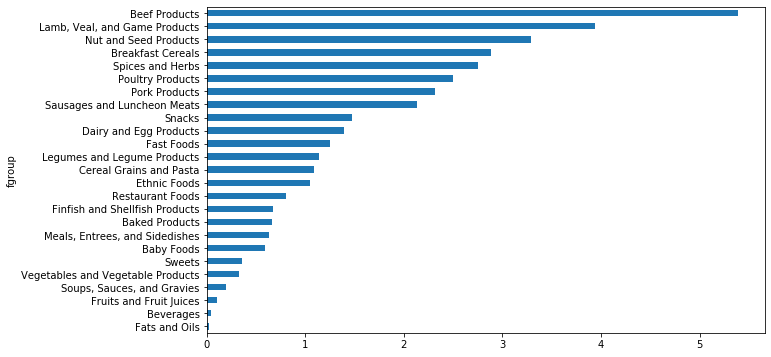

In [79]:
result['Zinc, Zn'].sort_values().plot(kind='barh')#对'Zinc, Zn'进行排序并画图

只要稍微动一动脑子，就可以发现各营养成分最为丰富的食物是什么了

### 14.5 2012联邦选举委员会数据库
美国联邦选举委员会发布了有关政治竞选赞助方面的数据。其中包括赞助者的姓名、职业、雇主、地址以及出资额等信息。我们对2012年美国总统大选的数据集比较感兴趣（http://www.fec.gov/disclosurep/PDownload.do）。我在2012年6月下载的数据集是一个150MB的CSV文件（P00000001-ALL.csv），我们先用pandas.read_csv将其加载进来：

In [2]:
fec = pd.read_csv('datasets/fec/P00000001-ALL.csv')#将数据读入dataframe 带表头
fec.info()

C:\Users\mok9697m\anaconda3\envs\tf37\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [3]:
fec[0:2]

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166


该DataFrame中的记录如下所示：

In [4]:
fec.iloc[123456]#选取指定行

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

你可能已经想出了许多办法从这些竞选赞助数据中抽取有关赞助人和赞助模式的统计信息。我将在接下来的内容中介绍几种不同的分析工作（运用到目前为止已经学到的方法）。

不难看出，该数据中没有党派信息，因此最好把它加进去。通过unique，你可以获取全部的候选人名单：

In [5]:
unique_cands = fec.cand_nm.unique()#选取cand_nm列 不重复的数据；即候选人名字
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [6]:
unique_cands[2]

'Obama, Barack'

指明党派信息的方法之一是使用字典：

In [7]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}#建立字典 供下面的map调用

现在，通过这个映射以及Series对象的map方法，你可以根据候选人姓名得到一组党派信息：

In [8]:
fec.cand_nm[123456:123461]#选取指定的行

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [9]:
fec[123456:123461].cand_nm#选取指定的行方法2

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [10]:
fec.cand_nm[123456:123461].map(parties)#对选取指定的行的部分列进行map 即进行列示

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [11]:
fec['party'] = fec.cand_nm.map(parties)#对cand_nm列用map方法按提供的字典进行列示并新添加一列'party'
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [12]:
fec[0:2]

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


这里有两个需要注意的地方。第一，该数据既包括赞助也包括退款（负的出资额）：

In [13]:
(fec.contb_receipt_amt > 0).value_counts()#统计捐赠金额大于0的数量

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

为了简化分析过程，我限定该数据集只能有正的出资额：

In [14]:
fec = fec[fec.contb_receipt_amt > 0]#选取捐赠金额大于0的数据 方括号里为布林判断式
fec.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


由于Barack Obama和Mitt Romney是最主要的两名候选人，所以我还专门准备了一个子集，只包含针对他们两人的竞选活动的赞助信息：

In [15]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]#通过判断cand_nm是否在['Obama, Barack', 'Romney, Mitt']列表中来选取数据
fec_mrbo

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
411,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,3.4023e+08,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
412,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,3.4023e+08,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
413,C00431171,P80003353,"Romney, Mitt","CARLSEN, RICHARD",APO,AE,9.128e+07,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
414,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,9.128e+07,CISCO,ENGINEER,30.0,21-AUG-11,NaN,NaN,NaN,SA17A,760261,Republican
415,C00431171,P80003353,"Romney, Mitt","SARGENT, MICHAEL",APO,AE,9.01201e+07,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701381,C00431445,P80003338,"Obama, Barack","MOUNTS, ROBERT",APO,ZZ,962043077,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-FEB-12,NaN,NaN,NaN,SA17A,787803,Democrat
701382,C00431445,P80003338,"Obama, Barack","TAITANO, TYRONE",HAGATNA,ZZ,969323373,NOT EMPLOYED,RETIRED,250.0,20-JAN-12,NaN,NaN,NaN,SA17A,775668,Democrat
701383,C00431445,P80003338,"Obama, Barack","TUCKER, PAMELA",APO,ZZ,963190030,DODEA,EDUCATOR,3.0,20-JAN-12,NaN,NaN,NaN,SA17A,775668,Democrat
701384,C00431445,P80003338,"Obama, Barack","MOUNTS, ROBERT",APO,ZZ,962043077,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-APR-12,NaN,NaN,NaN,SA17A,785239,Democrat


#### #根据职业和雇主统计赞助信息
基于职业的赞助信息统计是另一种经常被研究的统计任务。例如，律师们更倾向于资助民主党，而企业主则更倾向于资助共和党。你可以不相信我，自己看那些数据就知道了。首先，根据职业计算出资总额，这很简单：

In [16]:
fec.contbr_occupation.value_counts()[:10]#统计捐赠数量最多的职业

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

不难看出，许多职业都涉及相同的基本工作类型，或者同一样东西有多种变体。下面的代码片段可以清理一些这样的数据（将一个职业信息映射到另一个）。注意，这里巧妙地利用了dict.get，它允许没有映射关系的职业也能“通过”：

In [17]:
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}                                                             #建立替换字典

# If no mapping provided, return x
f = lambda x: occ_mapping.get(x, x)#如果不在字典返回原来的值
fec.contbr_occupation = fec.contbr_occupation.map(f)#使用字典对contbr_occupation进行map，这里用法类似apply，在字典的进行替换，不在的保持原来的

我对雇主信息也进行了同样的处理：

In [18]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)#使用字典对contbr_employer进行map，这里用法类似apply，在字典的进行替换，不在的保持原来的

In [19]:
fec

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,NOT PROVIDED,NOT PROVIDED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001726,C00500587,P20003281,"Perry, Rick","GORMAN, CHRIS D. MR.",INFO REQUESTED,XX,99999,NOT PROVIDED,NOT PROVIDED,5000.0,29-SEP-11,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,NaN,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,SA17A,751678,Republican
1001727,C00500587,P20003281,"Perry, Rick","DUFFY, DAVID A. MR.",INFO REQUESTED,XX,99999,DUFFY EQUIPMENT COMPANY INC.,BUSINESS OWNER,2500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican
1001728,C00500587,P20003281,"Perry, Rick","GRANE, BRYAN F. MR.",INFO REQUESTED,XX,99999,NOT PROVIDED,NOT PROVIDED,500.0,29-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican
1001729,C00500587,P20003281,"Perry, Rick","TOLBERT, DARYL MR.",INFO REQUESTED,XX,99999,T.A.C.C.,LONGWALL MAINTENANCE FOREMAN,500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican


现在，你可以通过pivot_table根据党派和职业对数据进行聚合，然后过滤掉总出资额不足200万美元的数据：

In [20]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party', aggfunc='sum')
#透视表 行上以contbr_occupation分组，列上以party'分组，对每组的捐赠金额总额进行分组统计 即二个party得到按职业分类捐赠的总金额

In [21]:
by_occupation

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
...,...,...
ZOOKEEPER,35.0,NaN
ZOOLOGIST,400.0,NaN
ZOOLOGY EDUCATION,25.0,NaN


In [22]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]#横向加总统计每个职业捐赠的总金额，并按大于2000000为标准进行过滤
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
LAWYER,3160478.87,3.912243e+05
MANAGER,762883.22,1.444532e+06


把这些数据做成柱状图看起来会更加清楚（'barh'表示水平柱状图，如图14-12所示）：

<AxesSubplot:ylabel='contbr_occupation'>

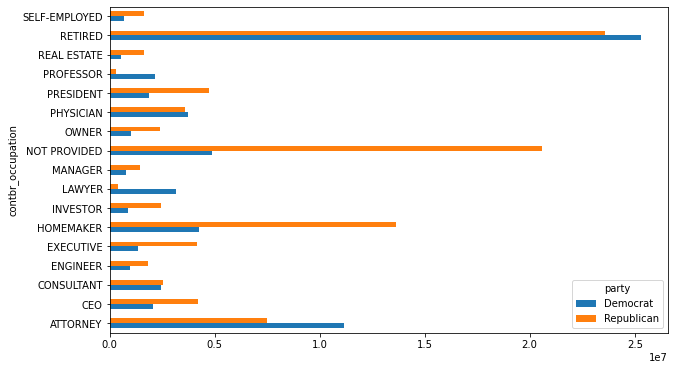

In [23]:
over_2mm.plot(kind='barh')

你可能还想了解一下对Obama和Romney总出资额最高的职业和企业。为此，我们先对候选人进行分组，然后使用本章前面介绍的类似top的方法：

In [24]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()#以传入的参数再次分组，取的每个分组捐赠金额总额 ；group为fec_mrbo.groupby('cand_nm')
    return totals.nlargest(n)#返回每个分组最大金额的前n个 

然后根据职业和雇主进行聚合：

In [25]:
fec_mrbo.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
411,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,3.4023e+08,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
412,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,3.4023e+08,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
413,C00431171,P80003353,"Romney, Mitt","CARLSEN, RICHARD",APO,AE,9.128e+07,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
414,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,9.128e+07,CISCO,ENGINEER,30.0,21-AUG-11,NaN,NaN,NaN,SA17A,760261,Republican
415,C00431171,P80003353,"Romney, Mitt","SARGENT, MICHAEL",APO,AE,9.01201e+07,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican


In [26]:
grouped = fec_mrbo.groupby('cand_nm')#以候选人进行分组

In [27]:
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)#调用函数 传入捐赠人职业为参数 取得最大7个排名 contbr_occupation传给key 

cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                            

In [28]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)#调用函数 传入捐赠人员工为参数 取得最大10个排名 contbr_occupation传给key

cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                     

#### #对出资额分组
还可以对该数据做另一种非常实用的分析：利用cut函数根据出资额的大小将数据离散化到多个面元中：

In [33]:
bins = np.array([0, 1, 10, 100, 1000, 10000,
                 100000, 1000000, 10000000])#分组要求 分为8组
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)  #将捐赠款 切为8个#可以作为groupby的分组要求
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

现在可以根据候选人姓名以及面元标签对奥巴马和罗姆尼数据进行分组，以得到一个柱状图：

In [35]:
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size()

cand_nm        contb_receipt_amt  
Obama, Barack  (0, 1]                    493
               (1, 10]                 40070
               (10, 100]              372280
               (100, 1000]            153991
               (1000, 10000]           22284
               (10000, 100000]             2
               (100000, 1000000]           3
               (1000000, 10000000]         4
Romney, Mitt   (0, 1]                     77
               (1, 10]                  3681
               (10, 100]               31853
               (100, 1000]             43357
               (1000, 10000]           26186
               (10000, 100000]             1
               (100000, 1000000]           0
               (1000000, 10000000]         0
dtype: int64

In [36]:
grouped.size().unstack(0)#统计每个分组的个数 并转置0轴 即打平cand_nm

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


从这个数据中可以看出，在小额赞助方面，Obama获得的数量比Romney多得多。你还可以对出资额求和并在面元内规格化，以便图形化显示两位候选人各种赞助额度的比例（见图14-13）：

In [37]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)#分组后对捐赠金额加总并转置0轴 即打平cand_nm
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


In [39]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)#向量化计算  先横向加总再在0轴方向依次除以加总数量
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


<AxesSubplot:ylabel='contb_receipt_amt'>

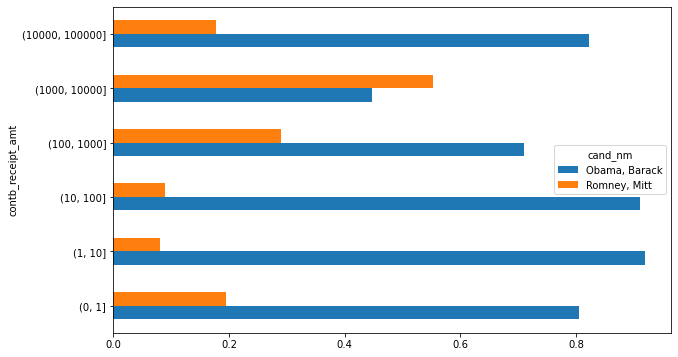

In [40]:
normed_sums[:-2].plot(kind='barh')#最后2行不要

我排除了两个最大的面元，因为这些不是由个人捐赠的。

还可以对该分析过程做许多的提炼和改进。比如说，可以根据赞助人的姓名和邮编对数据进行聚合，以便找出哪些人进行了多次小额捐款，哪些人又进行了一次或多次大额捐款。我强烈建议你下载这些数据并自己摸索一下。
#### #根据州统计赞助信息
根据候选人和州对数据进行聚合是常规操作：

In [41]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])#按候选人、州名进行分组
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)#对分组的捐赠额按分组加总 并转置；遗失值填0

In [42]:
totals

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AA,56405.00,135.00
AB,2048.00,0.00
AE,42973.75,5680.00
AK,281840.15,86204.24
AL,543123.48,527303.51
...,...,...
WI,1130155.46,270316.32
WV,169154.47,126725.12
WY,194046.74,252595.84


In [45]:
totals = totals[totals.sum(1) > 100000]#过滤出捐赠合计大于100000的地区
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


如果对各行除以总赞助额，就会得到各候选人在各州的总赞助额比例：

In [44]:
percent = totals.div(totals.sum(1), axis=0)
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224
